In [1]:
import os

# 获取当前工作目录

current_directory = os.getcwd()

print("当前工作目录:", current_directory)

当前工作目录: D:\Data\Shap


In [2]:
import pandas as pd
          
import numpy as np

import matplotlib.pyplot as plt
          
from sklearn.model_selection import train_test_split          

In [3]:
# 设置字体为新罗马数字
plt.rcParams['font.family'] = 'Times New Roman'

# 处理负号          
plt.rcParams['axes.unicode_minus'] = False

# 忽略警告
import warnings
          
warnings.filterwarnings("ignore")

In [4]:
# 读取数据
df = pd.read_csv('data.csv')

In [5]:
# 划分特征和目标变量 
# 删除 'target' 列

X = df.drop(['target'], axis=1)        

# 获取 'target' 列作为目标变量

y = df['target']  

In [6]:
# 划分训练集和测试集      
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=df['target'])
# 观察前几行
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  target  
0   0     1       0  
1   3     0       1  
2   2     2       1  
3   0     0       0  
4   0     0       0

In [7]:
# 导入库
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [8]:
# LightGBM模型参数
params_lgb = { 
              'learning_rate': 0.02,         # 学习率，控制每一步的步长，用于防止过拟合。典型值范围：0.01 - 0.1  
              
              'boosting_type': 'gbdt',        # 提升方法，这里使用梯度提升树（Gradient Boosting Decision Tree，简称GBDT） 
              
              'objective': 'regression',      # 损失函数    
              
              'metric': 'rmse',               # 评估指标    
             
              'num_leaves': 127,              # 每棵树的叶子节点数量，控制模型复杂度。较大值可以提高模型复杂度但可能导致过拟合    
             
              'verbosity': 1,                 # 控制 LightGBM 输出信息的详细程度 
             
              'seed': 42,                     # 随机种子，用于重现模型的结果   
             
              'n_jobs': -1,                   # 并行运算的线程数量，-1表示使用所有可用的CPU核心    
              
              'colsample_bytree': 0.6,        # 每棵树随机选择的特征比例，用于增加模型的泛化能力    
              
              'subsample': 0.7               # 每次迭代时随机选择的样本比例，用于增加模型的泛化能力
             }

In [9]:
# 初始化LightGBM分类模型
model_lgb = lgb.LGBMRegressor(**params_lgb)

In [10]:
# 定义参数网格，用于网格搜索
          
param_grid = {
          
    'n_estimators': [100, 200, 300, 400, 500],  # 树的数量
          
    'max_depth': [3, 4, 5, 6, 7],               # 树的深度
          
    'learning_rate': [0.01, 0.02, 0.05, 0.1],   # 学习率       
}

In [11]:
# 使用GridSearchCV进行网格搜索和k折交叉验证
          
grid_search = GridSearchCV(
          
    estimator=model_lgb,
          
    param_grid=param_grid,
          
    scoring='neg_mean_squared_error',  # 评价指标为负均方误差
          
    cv=5,                             # 5折交叉验证
          
    n_jobs=-1,                        # 并行计算
          
    verbose=1                         # 输出详细进度信息
    
)

In [12]:
# 训练模型
          
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 13
[LightGBM] [Info] Start training from score 0.459916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=5,
             estimator=LGBMRegressor(colsample_bytree=0.6, learning_rate=0.02,
                                     metric='rmse', n_jobs=-1, num_leaves=127,
                                     objective='regression', seed=42,
                                     subsample=0.7, verbosity=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [13]:
# 输出最优参数
          
print("Best parameters found: ", grid_search.best_params_)
          
print("Best RMSE score: ", (-grid_search.best_score_) ** 0.5)  # 还原RMSE

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
Best RMSE score:  0.35717563858510093


In [14]:
# 使用最优参数训练模型

best_model = grid_search.best_estimator_

In [15]:
# 获取LightGBM模型的特征贡献度（重要性）
          
feature_importances = best_model.feature_importances_
          
# 将特征和其重要性一起排序
          
sorted_indices = np.argsort(feature_importances)[::-1]  # 逆序排列，重要性从高到低
          
sorted_features = X_train.columns[sorted_indices]
          
sorted_importances = feature_importances[sorted_indices]
          
# 绘制按重要性排序的特征贡献性柱状图
          
plt.figure(figsize=(10, 6), dpi=1200) 
          
# 使用渐变色，确保最高值为红色

bars = plt.barh(sorted_features, sorted_importances, color="steelblue")

# 添加坐标轴标签
plt.xlabel('Importance',fontsize=10,fontweight='bold')

plt.ylabel('Feature',fontsize=10,fontweight='bold')

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'Lightgbm',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件 
          
plt.gca().invert_yaxis()
          
plt.savefig("Feature_importance_Lightgbm.pdf", format='pdf',bbox_inches='tight')
          
# 显示图表
          
plt.show()

In [16]:
# 开始计算Shap值

import shap
          
explainer = shap.TreeExplainer(best_model)

# 计算shap值为numpy.array数组

shap_values_numpy = explainer.shap_values(X)
          
# 计算shap值为Explanation格式
          
shap_values_Explanation = explainer(X)

In [17]:
# 宽度为 10 英寸，高度为 5 英寸,分辨率为1200

plt.figure(figsize=(10, 5), dpi=1200)
          
# 绘制蜂群图，并设置 show=False 以避免直接显示
          
shap.plots.beeswarm(shap_values_Explanation, show=False,max_display=13)
   
# 开启网格线

plt.grid(visible=True, linestyle='--', color='gray', alpha=0.1)  

# 添加坐标轴标签
plt.xlabel('Shapley',fontsize=10,fontweight='bold')

plt.ylabel('Feature',fontsize=10,fontweight='bold')

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'LightGBM',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件
plt.savefig(f"Shap_beeswarm_Lightgbm.pdf", format='pdf', bbox_inches='tight')

plt.tight_layout()

plt.show()

In [18]:
# 设置 max_display 值

max_display = 13

# 创建图形

plt.figure(figsize=(10, 5), dpi=1200)

# 创建 SHAP 值条形图，并使用 max_display 参数限制最多显示的特征数量

shap.plots.bar(shap_values_Explanation, max_display=max_display, show=False)

# 获取当前图形的 Axes

ax = plt.gca()

# 隐藏条形图后面的数字

for text in ax.texts:
    text.set_visible(False)
    
# 获取 SHAP 值并进行排序

shap_values_sorted = shap_values_Explanation.values.flatten()

sorted_indices = np.argsort(shap_values_sorted)[::-1]  # 逆序排列

sorted_shap_values = shap_values_sorted[sorted_indices][:max_display]

# 创建从蓝色到红色的渐变色

colors = plt.cm.autumn(np.linspace(0, 1, max_display))

# 应用颜色到条形图

for i, bar in enumerate(ax.patches):
    bar.set_facecolor(colors[i])

# 添加坐标轴标签

plt.xlabel('shap.abs.mean',fontsize=10,fontweight='bold')

plt.ylabel('Feature',fontsize=10,fontweight='bold')

# 设置x轴和y轴的刻度标签字体大小

plt.tick_params(axis='both', labelsize=8)  

# 设置标题

plt.title(f'Lightgbm',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件

plt.savefig(f"Shap_importance_Lightgbm.pdf", format='pdf', bbox_inches='tight')

plt.tight_layout()

plt.show()

In [19]:
plt.figure(figsize=(10, 5), dpi=1200)
          
# 创建 SHAP 值条形图，展示数据
          
shap.plots.bar(shap_values_Explanation[1], show_data=True, show=False, max_display=13)
          
# 添加坐标轴标签
plt.xlabel('Shaply',fontsize=10,fontweight='bold')

plt.ylabel('Feature',fontsize=10,fontweight='bold')

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'Lightgbm',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件 
plt.savefig("SHAP_bar_Lightgbm.pdf", format='pdf', bbox_inches='tight')
          
plt.tight_layout()
          
plt.show()

In [20]:
plt.figure(figsize=(10, 5), dpi=1200)
          
# 绘制第1个样本的 SHAP 瀑布图，并设置 show=False 以避免直接显示
          
shap.plots.waterfall(shap_values_Explanation[1], show=False, max_display=13)
# 添加坐标轴标签
plt.xlabel('Shaply',fontsize=10,fontweight='bold')

plt.ylabel('Feature',fontsize=10,fontweight='bold')

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'Lightgbm',loc='left', fontsize=10, fontweight='bold')
          
# 保存图像为 PDF 文件
          
plt.savefig("SHAP_waterfall_Lightgbm.pdf", format='pdf', bbox_inches='tight')
          
plt.tight_layout()
          
plt.show()

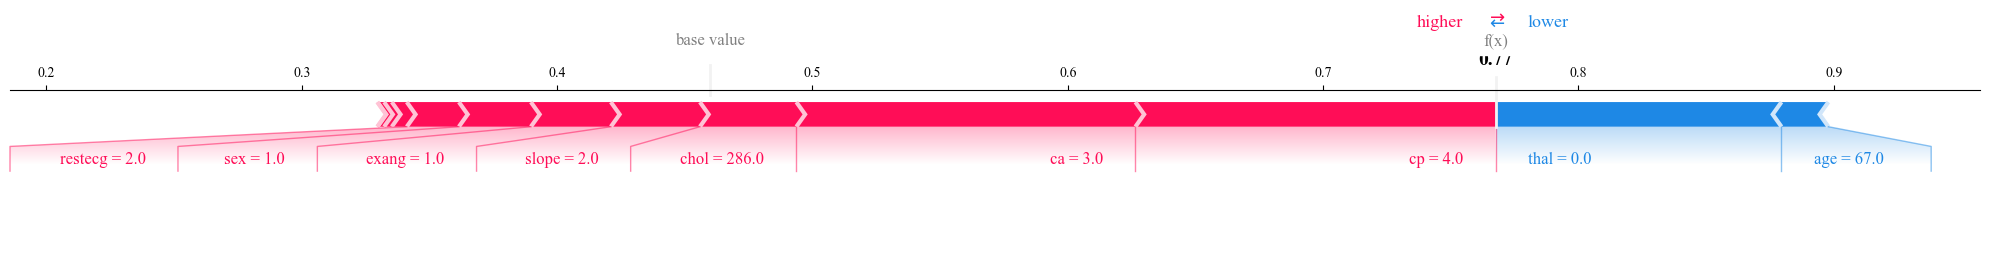

In [21]:
# 绘制力图

shap.force_plot(shap_values_Explanation[1],matplotlib=True,show=False)

plt.savefig("SHAP_force_Lightgbm.pdf", format='pdf', bbox_inches='tight')

plt.tight_layout()

plt.show()

In [22]:
# 绘制 'age' 特征的SHAP依赖图
shap.dependence_plot('age', shap_values_Explanation.values, X, show=False)

plt.savefig("SHAP Dependence Plot_1.pdf", format='pdf',bbox_inches='tight',dpi=1200)

In [23]:
# SHAP依赖性图

In [24]:
# 加载相关包 

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

# GBT模型参数

params_gbt = {    
    'learning_rate': 0.02,            # 学习率，控制每一步的步长，用于防止过拟合。典型值范围：0.01 - 0.1
    
    'max_depth': 3,                   # 树的深度，控制模型复杂度    
    
    'random_state': 42,               # 随机种子，用于重现模型的结果   
    
    'subsample': 0.7,                 # 每次迭代时随机选择的样本比例，用于增加模型的泛化能力
    
}

In [25]:
# 初始化Gradient Boosting分类模型

model_gbt = GradientBoostingClassifier(**params_gbt)

In [26]:
# 定义参数网格，用于网格搜索
param_grid = {    
    
    'n_estimators': [100, 200, 300],  # 树的数量    
    
    'max_depth': [3, 4, 5],               # 树的深度 
    
    'learning_rate': [0.01, 0.1],   # 学习率
    
}

In [27]:
# 使用GridSearchCV进行网格搜索和k折交叉验证
grid_search = GridSearchCV(    
    
    estimator=model_gbt,    
    
    param_grid=param_grid,    
    
    scoring='neg_log_loss',  # 评价指标为负对数损失   
    
    cv=5,                    # 5折交叉验证    
    
    n_jobs=-1,               # 并行计算    
    
    verbose=1                # 输出详细进度信息
    
)

In [28]:
# 训练模型

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                  random_state=42,
                                                  subsample=0.7),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_log_loss', verbose=1)

In [29]:
# 使用最优参数训练模型

best_model = grid_search.best_estimator_

In [30]:
import shap

explainer = shap.TreeExplainer(best_model)

# 计算shap值为numpy.array数组

shap_values_numpy = explainer.shap_values(X)

# 计算shap值为Explanation格式

shap_values_Explanation = explainer(X)

In [31]:
# 绘制 'age' 特征的SHAP依赖图

shap.dependence_plot('age', shap_values_Explanation.values, X, show=False)

plt.savefig("SHAP Dependence Plot_1.pdf", format='pdf',bbox_inches='tight',dpi=1200)

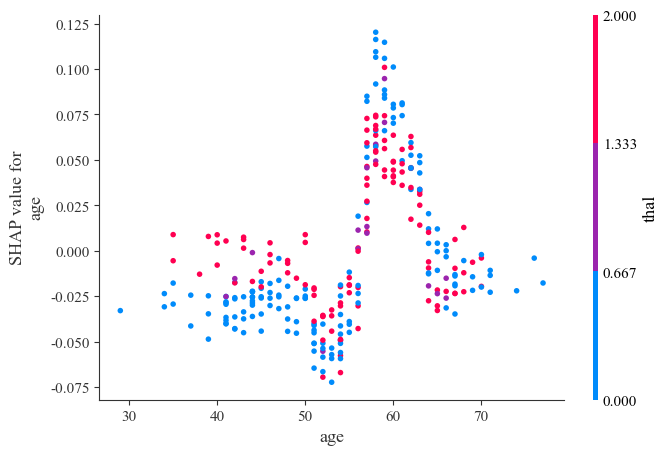

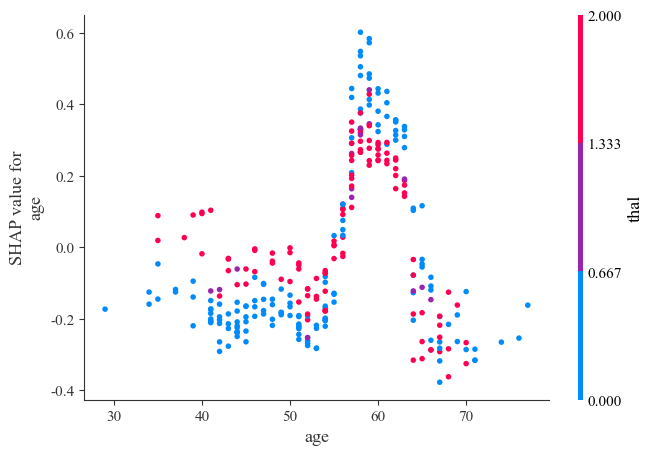

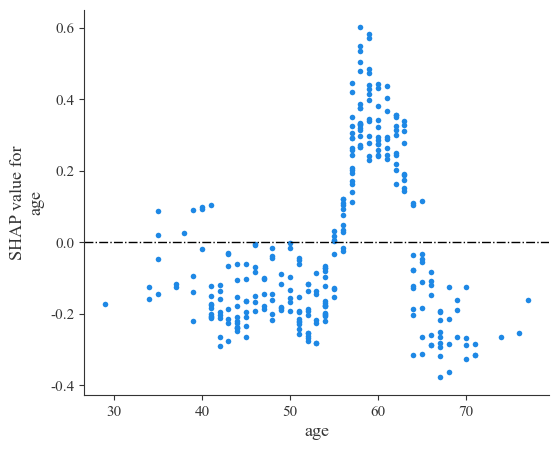

In [32]:
# 绘制 'age' 特征的 SHAP 依赖图，不显示颜色条

shap.dependence_plot('age', shap_values_Explanation.values, X, interaction_index=None, show=False)

# 添加 SHAP=0 的横线

plt.axhline(y=0, color='black', linestyle='-.', linewidth=1)

plt.savefig("SHAP Dependence Plot_2.pdf", format='pdf',bbox_inches='tight',dpi=1200)

plt.show()

In [33]:
# 将 SHAP 值转换为 DataFrame 格式以便于自定义绘图

shap_values_df = pd.DataFrame(shap_values_numpy, columns=X.columns)

shap_values_df.head()

age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.190186  0.084787 -0.734280 -0.002215 -0.097758 -0.018143  0.047404   
1 -0.283147  0.119876  0.803834  0.094065  0.228201 -0.001496  0.124833   
2 -0.252251  0.083470  0.586611  0.010132  0.022828  0.000615  0.091015   
3 -0.125696  0.082732 -0.227718 -0.007189  0.092067  0.004726 -0.029260   
4 -0.175014 -0.124172 -0.666819 -0.023836 -0.261307  0.000059  0.056463   

    thalach     exang   oldpeak     slope        ca      thal  
0 -0.013115 -0.051688  0.207225  0.133846 -0.622040  0.052229  
1  0.062339  0.157153  0.021461  0.156638  0.686106 -0.572938  
2  0.050389  0.107720  0.656412  0.195157  0.617766  0.686010  
3 -0.314236 -0.057505  2.175741  0.098257 -0.358163 -0.505072  
4 -0.064500 -0.039273 -0.098327 -0.189453 -0.486007 -0.704893

In [34]:
print(shap_values_df)

          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.190186  0.084787 -0.734280 -0.002215 -0.097758 -0.018143  0.047404   
1   -0.283147  0.119876  0.803834  0.094065  0.228201 -0.001496  0.124833   
2   -0.252251  0.083470  0.586611  0.010132  0.022828  0.000615  0.091015   
3   -0.125696  0.082732 -0.227718 -0.007189  0.092067  0.004726 -0.029260   
4   -0.175014 -0.124172 -0.666819 -0.023836 -0.261307  0.000059  0.056463   
..        ...       ...       ...       ...       ...       ...       ...   
292  0.170428 -0.078756  0.626413  0.029045  0.111354  0.001247 -0.068708   
293 -0.103686  0.082094 -0.847959 -0.015511  0.196649  0.005041 -0.034507   
294 -0.362817  0.087389  0.506811  0.051991 -0.103825  0.003285 -0.095223   
295  0.192041  0.054501  0.797986  0.052005 -0.270821  0.001827 -0.087356   
296  0.443555 -0.179767 -0.679982  0.027830  0.005267  0.001427  0.097740   

      thalach     exang   oldpeak     slope        ca      thal  
0   -0.01

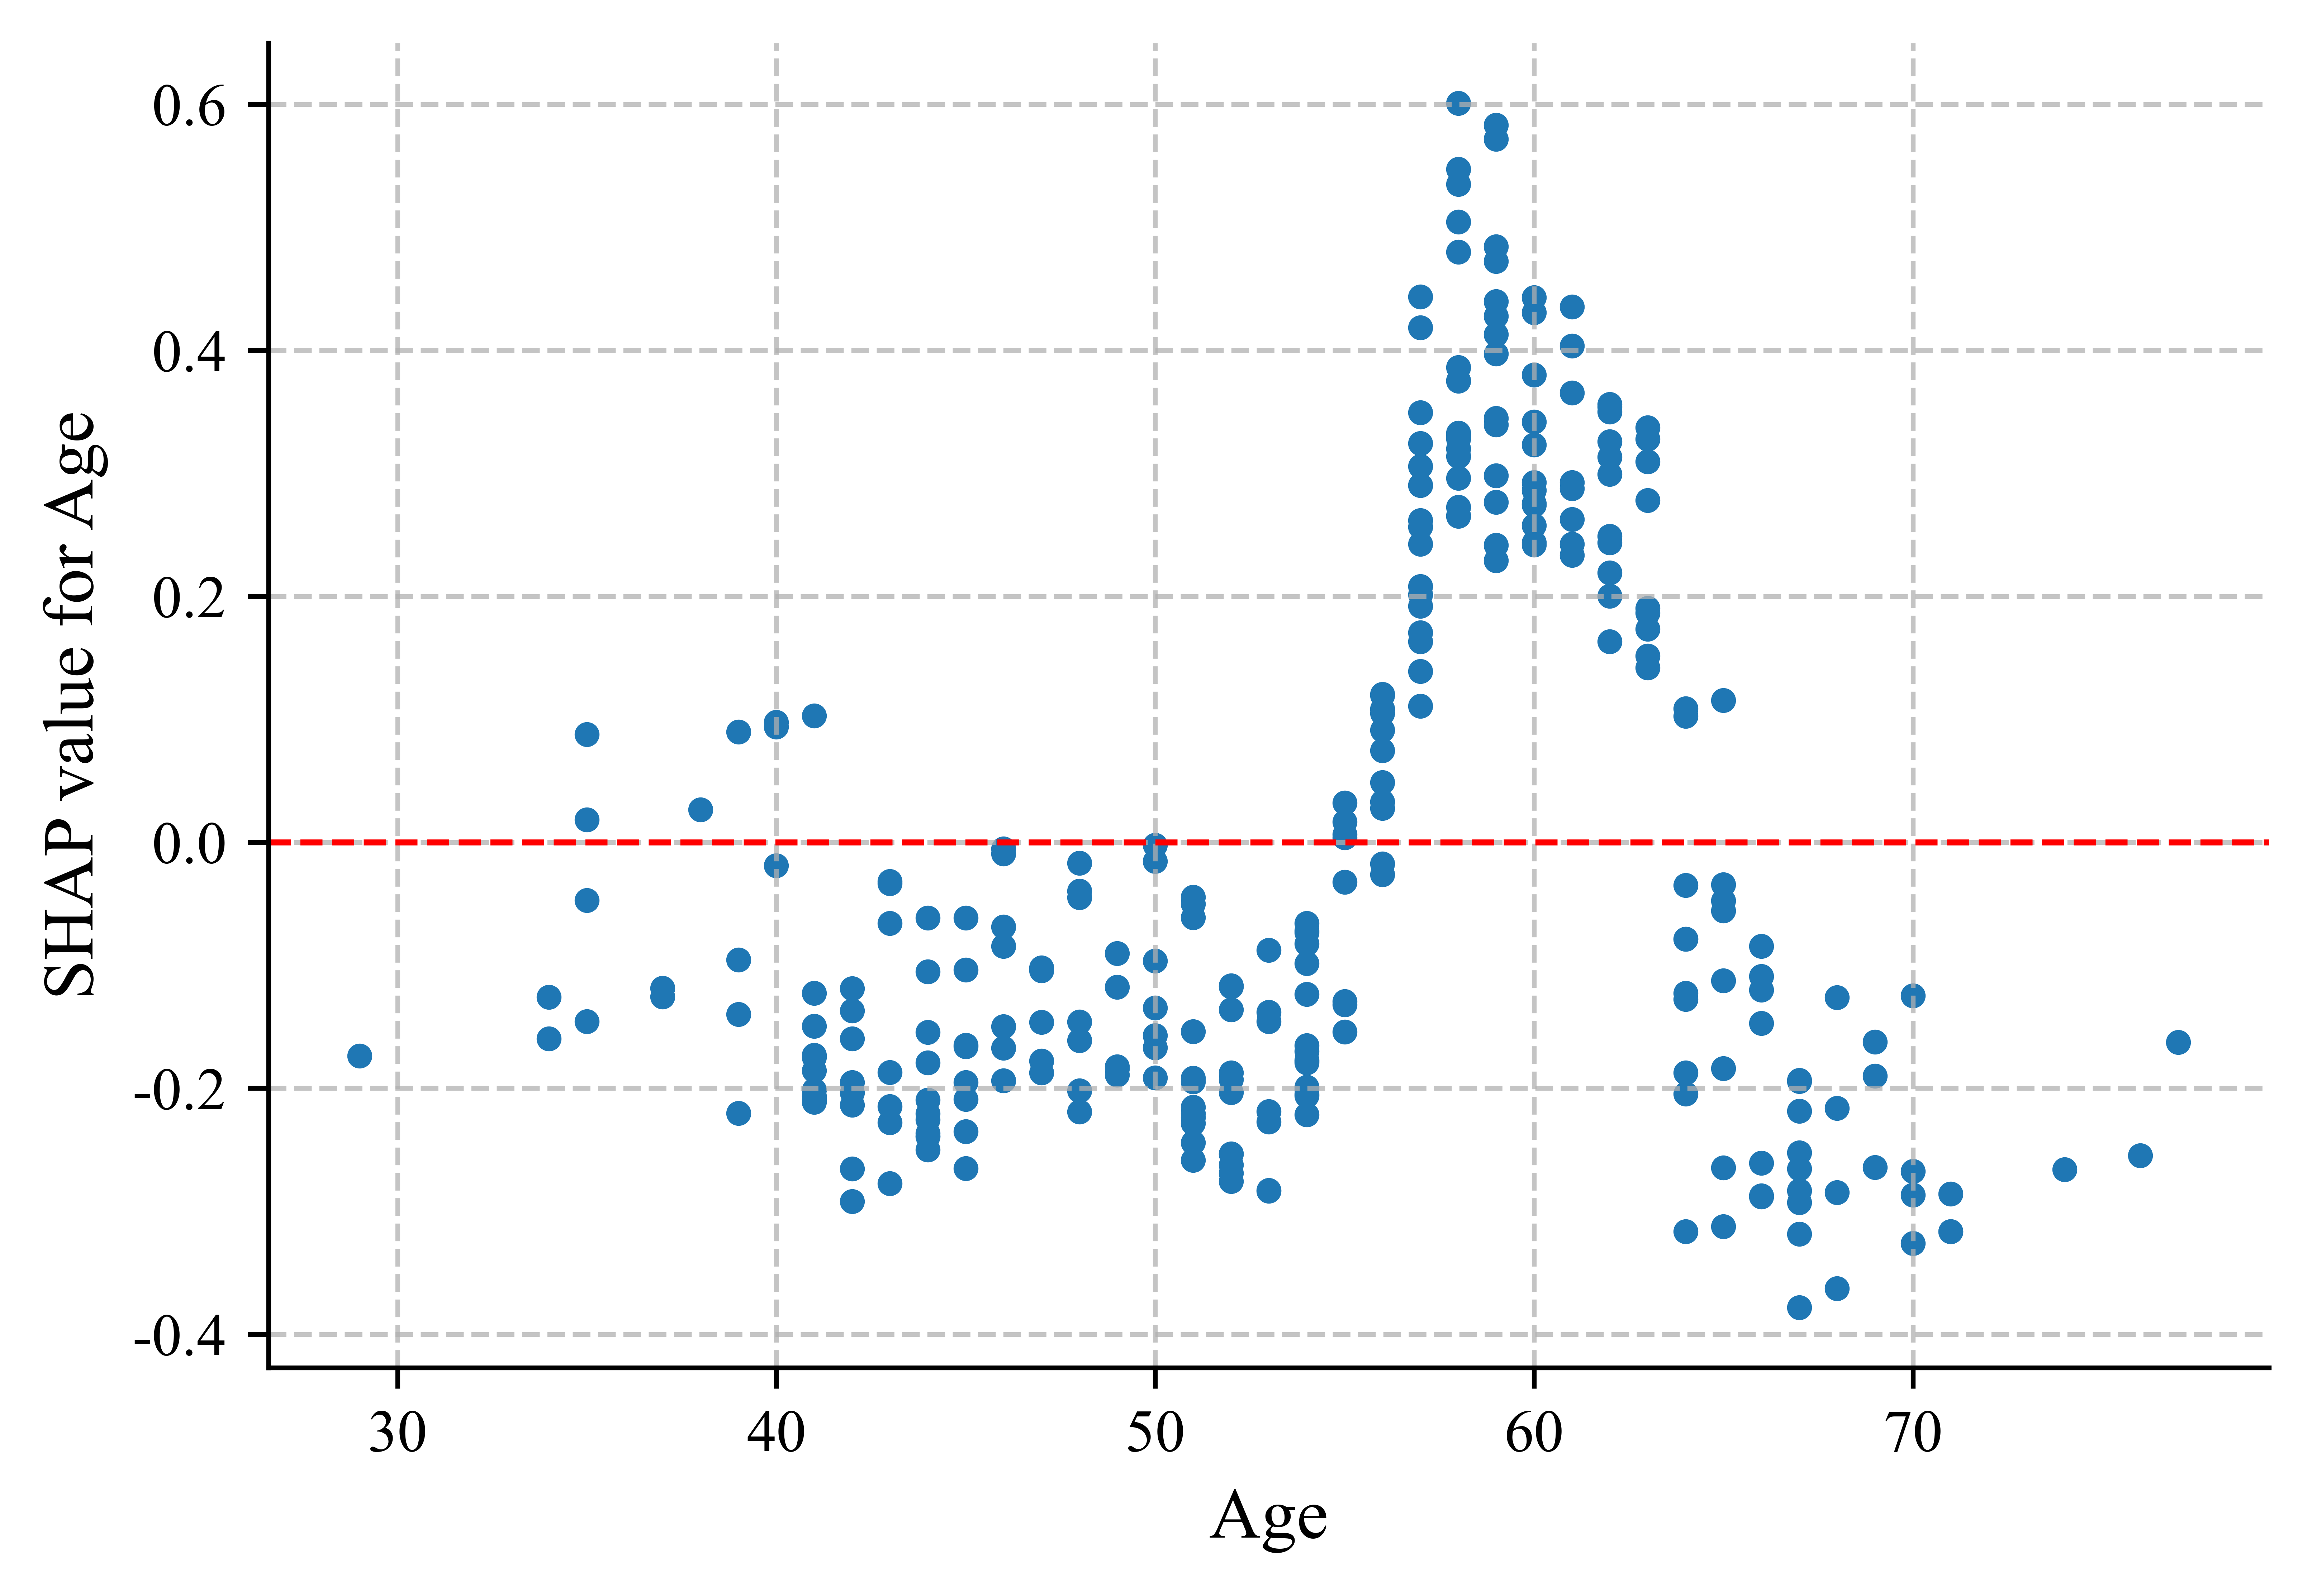

In [35]:
# 绘制散点图，x轴是'age'特征，y轴是SHAP值

plt.figure(figsize=(6, 4),dpi=1200)

plt.scatter(df['age'], shap_values_df['age'], s=10)

# 开启网格线

plt.grid(visible=True, linestyle='--', alpha=0.75) 

# 添加shap=0的横线

plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

plt.xlabel('Age', fontsize=12)

plt.ylabel('SHAP value for Age', fontsize=12) 

ax = plt.gca()

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.savefig("SHAP Dependence Plot_3.pdf", format='pdf',bbox_inches='tight')

plt.show()

In [39]:
import matplotlib.pyplot as plt

# 定义绘制 SHAP 依赖图的函数
def plot_shap_dependence(feature_list, df, shap_values_df, file_name="SHAP_Depend_Plots.pdf"):  
    fig, axs = plt.subplots(2, 3, figsize=(12, 8), dpi=1200) 
    plt.subplots_adjust(hspace=0.4, wspace=0.4)        

    # 循环绘制每个特征的 SHAP 依赖图    
    for i, feature in enumerate(feature_list):  
        row = i // 3  # 行号    
        col = i % 3   # 列号    
        ax = axs[row, col]                

        # 绘制散点图，x轴是特征值，y轴是SHAP值 
        ax.scatter(df[feature], shap_values_df[feature], s=10)   

        # 添加shap=0的横线  
        ax.axhline(y=0, color='red', linestyle='--', linewidth=1)   
      
        # 设置x和y轴标签     
        ax.set_xlabel(feature, fontsize=12) 
        ax.set_ylabel(f'SHAP value for\n{feature}', fontsize=12)                
        
        # 隐藏顶部和右侧的脊柱  
        ax.spines['top'].set_visible(False)  
        ax.spines['right'].set_visible(False)    
        
        # 添加网格线
        ax.grid(True, linestyle='--', alpha=0.75)  

    # 隐藏最后一个空图表的坐标轴 (若画布未关闭) 
    axs[1, 2].axis('off') 

    # 设置标题
    plt.suptitle("SHAP Dependence Plots", fontsize=14, fontweight='bold') 
    
    # 保存图像为 PDF 文件
    plt.savefig(file_name, format='pdf', bbox_inches='tight') 
    plt.show()

# 使用函数绘制特征的 SHAP 依赖图

feature_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plot_shap_dependence(feature_list, df, shap_values_df)
